<a href="https://colab.research.google.com/github/macruga/predictive-analytics/blob/main/911_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Classroom/Predictive Analytics 1/911.csv")

In [ ]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Data description

**lat** : Latitude

**lng**: Longitude

**desc**: Emergency Call Description

**zip**: Zipcode

**title**: Title

**timeStamp**: Call date, YYYY-MM-DD HH:MM:SS

**twp**: Township

**addr**: Address

**e**: Default 1

In [ ]:
# Fix columns, for zip, remove '.0', and set datetime for timestamp column
data['zip'] = data['zip'].astype(str).replace('\.0','', regex=True)
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [ ]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


## Questions

### What are the top 5 townships?

In [ ]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### What are the top 5 zipcodes?

In [ ]:
data_zip = data[data['zip'] != 'nan'] # Select data from calls where zip not nan
data_zip['zip'].value_counts().head(5)

19401    6979
19464    6643
19403    4854
19446    4748
19406    3174
Name: zip, dtype: int64

### How many dufferent tittles?

In [ ]:
data['title'].nunique()

110

## Identify call type

#### Split description for get call type, use split on : an take de first array position

In [ ]:
data['call_type'] = data['title'].apply(lambda title: title.split(':')[0])

In [ ]:
data['call_type'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: call_type, dtype: int64

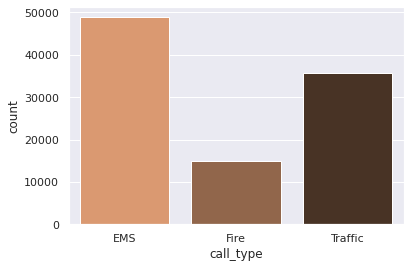

In [ ]:
sns.countplot(x='call_type',data=data, palette='copper_r')

## Get Hour, Month and day for timestamp

In [ ]:
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['Month'] = data['timeStamp'].apply(lambda x: x.month)
data['Day'] = data['timeStamp'].apply(lambda x: x.dayofweek)

### Map day for name instead of integer 

In [ ]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
data['Day'] = data['Day'].map(day_map)

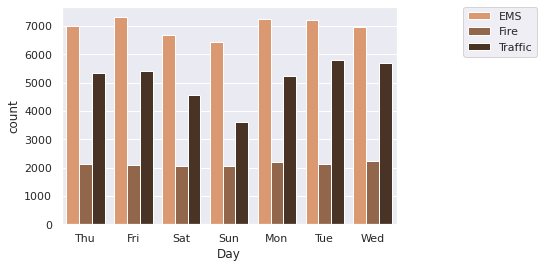

In [ ]:
sns.countplot(x='Day',data=data,hue='call_type',palette='copper_r')
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)


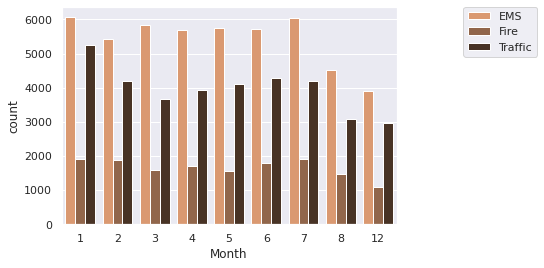

In [ ]:
sns.countplot(x='Month',data=data,hue='call_type',palette='copper_r')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

### No data for 9, 10 and 11 months?

In [ ]:
month_grouped = data.groupby('Month').count()
month_grouped

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969


### Linear fit on calls per month

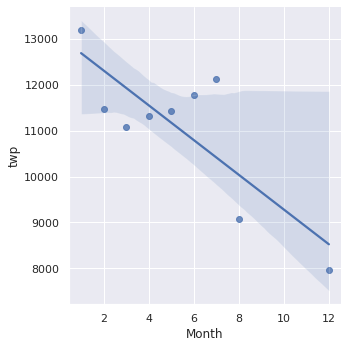

In [ ]:
sns.lmplot(x='Month',y='twp',data=month_grouped.reset_index())

### Create new column for date

In [ ]:
data['Date'] = data['timeStamp'].apply(lambda t: t.date())
# data['Date'] = data['Date'].astype(str)
# data['Date'] = data['Date'].apply(lambda title: title.split('-')[0] +'-'+ title.split('-')[1] )

In [ ]:
data['Date'].value_counts()

2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
             ... 
2016-02-07    255
2016-03-20    244
2016-05-01    140
2016-08-24    132
2015-12-10    115
Name: Date, Length: 259, dtype: int64

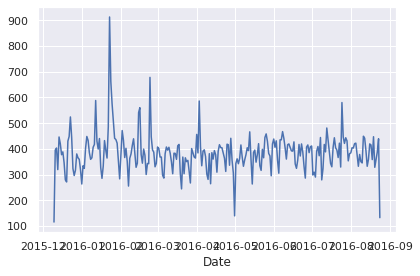

In [ ]:
data.groupby('Date').count()['twp'].plot()
plt.tight_layout()

### Now by call type

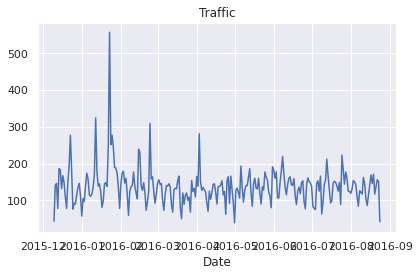

In [ ]:
data[data['call_type']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

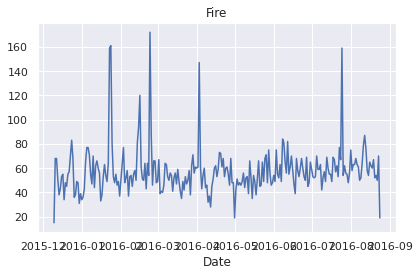

In [ ]:
data[data['call_type']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

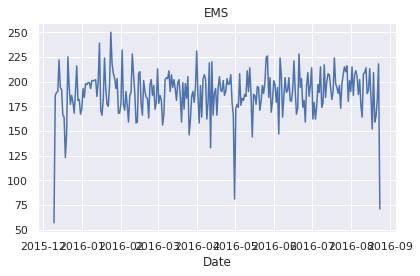

In [ ]:
data[data['call_type']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

###  Create heatmap by day month

In [ ]:
dayMonth = data.groupby(by=['Day','Month']).count()['call_type'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


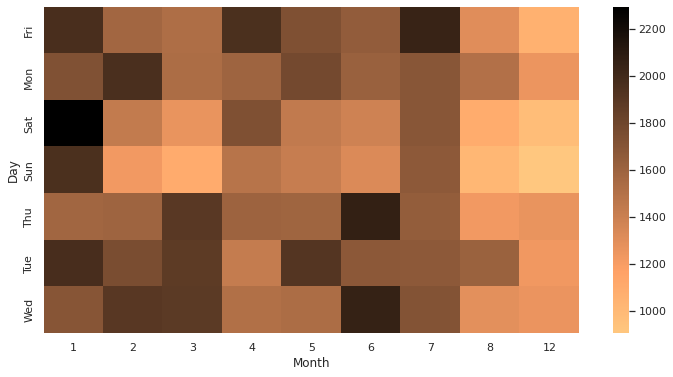

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='copper_r')

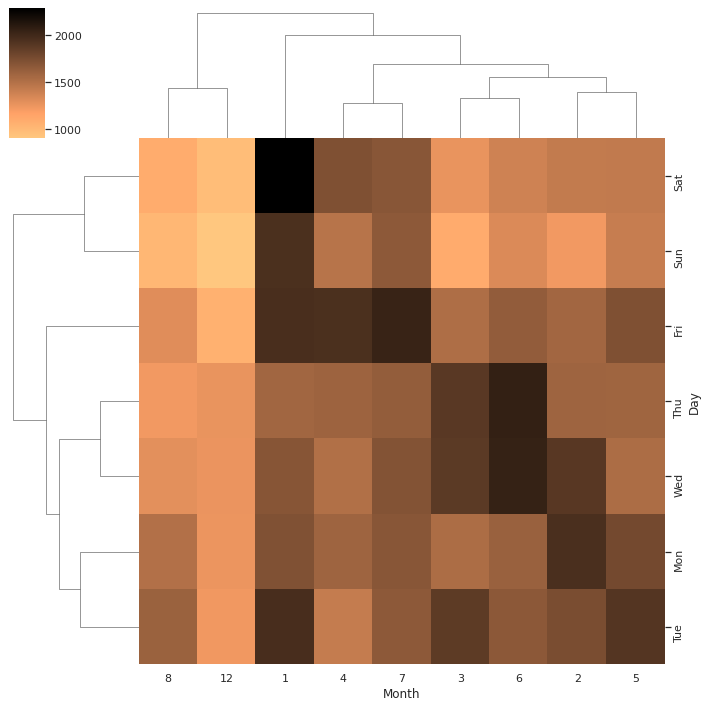

In [ ]:
sns.clustermap(dayMonth,cmap='copper_r')